## 安裝套件

!pip install Selenium

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup

# 測試自動開啟網頁  
指定路徑及設定等待最長時間  
path=r'C:\webdriver\chromedriver'

In [3]:
path=r'C:\webdriver\chromedriver'

In [59]:
url='https://tw.yahoo.com/'

## 取得網頁物件chrome

In [5]:
chrome=webdriver.Chrome(path)
chrome.implicitly_wait(10)
chrome.get(url)    
print(chrome.page_source)

<html id="Stencil" lang="zh-Hant-TW" class="StencilRoot  my3columns ua-wk ua-win ua-10.0 ua-wk537  l-out Pos-r https fp fp-default uh-topbar-on ltr desktop Desktop bktOriginal_Color centered-aligned-layout JsEnabled jsenabled js no-touch yui3-js-enabled stencil-js stencil-canvas stencil-no-touch stencil-csstransforms3d stencil-csstransitions stencil-svg stencil-fullscreen stencil-no-overflowscrolling stencil-plugin-toggle stencil-plugin-sticker Sticky-on stencil-plugin-lightbox stencil-plugin-bquery stencil-plugin-imageloader stencil-plugin-selectbox stencil-plugin-source stencil-plugin-tooltip" style=""><head>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    
    <title>Yahoo奇摩</title><meta http-equiv="x-dns-prefetch-control" content="on"><link rel="dns-prefetch" href="//s.yimg.com"><link rel="preconnect" href="//s.yimg.com"><link rel="dns-prefetch" href="//csc.beap.bc.yahoo.com"><link rel="preconnect" href="//csc.beap.bc.yahoo.com"><link rel="dns-prefetch" href="//geo.ya

## 關閉網頁

In [6]:
chrome.quit()

## 使用隱藏網頁方式  
options=webdriver.ChromeOptions()  
options.add_argument('--headless')

## 設定ChromeOptions

In [7]:
#隱藏設定
options=webdriver.ChromeOptions()  
options.add_argument('--headless')

In [8]:
chrome=webdriver.Chrome(path,options=options)
chrome.implicitly_wait(10)
chrome.get(url)    
print(chrome.page_source)
chrome.quit()

<html id="Stencil" lang="zh-Hant-TW" class="StencilRoot  my3columns ua-wk ua-win ua-10.0 ua-wk537  l-out Pos-r https fp fp-default uh-topbar-on ltr desktop Desktop bktOriginal_Color centered-aligned-layout JsEnabled jsenabled js no-touch yui3-js-enabled stencil-js stencil-canvas stencil-no-touch stencil-csstransforms3d stencil-csstransitions stencil-svg stencil-fullscreen stencil-no-overflowscrolling stencil-plugin-toggle stencil-plugin-sticker Sticky-off stencil-plugin-lightbox stencil-plugin-bquery stencil-plugin-imageloader stencil-plugin-selectbox stencil-plugin-source stencil-plugin-tooltip" style=""><head>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    
    <title>Yahoo奇摩</title><meta http-equiv="x-dns-prefetch-control" content="on"><link rel="dns-prefetch" href="//s.yimg.com"><link rel="preconnect" href="//s.yimg.com"><link rel="dns-prefetch" href="//csc.beap.bc.yahoo.com"><link rel="preconnect" href="//csc.beap.bc.yahoo.com"><link rel="dns-prefetch" href="//geo.y

## 函式化

In [9]:
def getChrome(url,path=r'C:\webdriver\chromedriver',hide=False):
    options=webdriver.ChromeOptions()  
    if hide:
        options.add_argument('--headless')
    try:
        chrome=webdriver.Chrome(path,options=options)
        chrome.implicitly_wait(10)
        chrome.get(url)    
        return chrome
    except:
        return None

In [58]:

chrome=getChrome(url,hide=False)
print(chrome)

None


## 使用xpath指定元件

In [14]:
#股市連結
xpath='/html/body/div[2]/div[4]/div[2]/div/div[1]/div/div/div/div[1]/ul[1]/li[2]/a'

In [15]:
element=chrome.find_element_by_xpath(xpath)
element

<selenium.webdriver.remote.webelement.WebElement (session="e37c610eb78dcd2caafa1ee5d315b30f", element="3414d83a-8072-496a-940b-0457571c394e")>

In [16]:
element.click()

## 將page_source指定給BeautifulSoup

In [17]:
soup=BeautifulSoup(chrome.page_source,'lxml')
soup

<html class="chrome desktop JsEnabled" id="atomic" lang="zh-Hant-TW"><head prefix="og: http://ogp.me/ns#"><script async="" src="https://s.yimg.com/wi/ytc.js"></script><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><meta content="website" property="og:type"/><meta content="Yahoo奇摩股市提供國內外財經新聞，台股、期貨、選擇權、國際指數、外匯、港滬深股、美股等即時報價資訊，以及自選股、選股健診與多種分析工具，協助投資人快速制定投資策略。" property="og:description"/><meta content="https://s.yimg.com/cv/apiv2/social/images/yahoo_default_logo-1200x1200.png" property="og:image"/><meta content="Yahoo奇摩股市" property="og:title"/><meta content="https://tw.stock.yahoo.com/" property="og:url"/><meta content="guce.yahoo.com" name="oath:guce:consent-host"/><meta content="Yahoo奇摩股市提供國內外財經新聞，台股、期貨、選擇權、國際指數、外匯、港滬深股、美股等即時報價資訊，以及自選股、選股健診與多種分析工具，協助投資人快速制定投資策略。" name="twitter:description"/><meta content="https://s.yimg.com/cv/apiv2/social/images/yahoo_default_logo-1200x1200.png" name="twitter:image"/><meta con

## 找出大盤指數

In [18]:
soup.find('div',class_='D(f) Ai(fe) Jc(fe)').text.strip()

'成交0億'

In [19]:
soup.find('div',class_='D(f) Ai(fe) Jc(fe)').find_all('span')[0].text.strip()

'成交0億'

###  取得股市代號輸入框的xpath

In [28]:
xpath='/html/body/div[1]/div/div/div/div/div[2]/div[2]/div[2]/div/div/div/div/div[1]/input'

In [39]:
element=chrome.find_element_by_xpath(xpath)
element

<selenium.webdriver.remote.webelement.WebElement (session="e37c610eb78dcd2caafa1ee5d315b30f", element="febb9fcf-bc57-41bb-abef-56baab4edad0")>

### 台積電代號(2330)  

In [40]:
from selenium.webdriver.common.keys import Keys  

In [41]:
stock='2330'

In [45]:
element.clear()

In [46]:
element.send_keys(stock)

In [47]:
element.send_keys(Keys.ENTER)

## 找出成交彙整資訊xpath

In [49]:
xpath='/html/body/center/table[1]/tbody/tr/td[1]/table[1]/tbody/tr[2]/td[3]/a'

In [50]:
chrome.find_element_by_xpath(xpath).click()

In [51]:
soup=BeautifulSoup(chrome.page_source,'lxml')
soup

<html class="konq safari safari13 not_ie not_ie4 not_ie5 not_ie55 not_ie6 not_ie7 not_ie5_6 not_ie55_6 not_ie6_7 not_ie5_7 not_ns4 not_opera not_gecko not_firefox15 not_khtml not_safari12 not_safari11 not_macie yui3-js-enabled"><body><div class="" id="yui3-css-stamp" style="position: absolute !important; visibility: hidden !important"></div>
<meta content="false" name="oath:guce:product-eu"/>
<meta content="guce.yahoo.com" name="oath:guce:consent-host"/>
<meta content="zh-Hant-TW" name="oath:guce:locale"/>
<meta content="false" name="oath:guce:report-only"/>
<meta content="true" name="oath:guce:inline-consent"/>
<script async="" src="https://s.yimg.com/wi/ytc.js"></script><script async="" src="https://s.yimg.com/oa/guce.js"></script>
<!-- Rapid begin. -->
<script language="JavaScript" src="https://s.yimg.com/ss/rapid3.js"></script>
<script language="JavaScript" src="/__rapid-worker-1.2.js"></script> <!-- rapid should require worker file itself, this should be unnessary, but require it 

## 使用find_parent 找上一層

In [60]:
for tr in soup.find('td',string='時間').find_parent('tbody').find_all('tr'):
    for td in tr.find_all('td'):
        print(td.text.strip(),end='\t')
        
    print()

時間	開	高	低	收	漲跌	量(張)	


In [53]:
chrome.quit()

## google 搜尋 

In [63]:
url='https://www.google.com/?hl=zh_tw'

In [64]:
chrome=getChrome(url)
chrome

<selenium.webdriver.chrome.webdriver.WebDriver (session="1543a55100cf6c0af441006bc990cfbe")>

### 輸入框xpath

In [61]:
xpath='/html/body/div[2]/div[2]/form/div[2]/div[1]/div[1]/div/div[2]/input'

In [65]:
element=chrome.find_element_by_xpath(xpath)
element

<selenium.webdriver.remote.webelement.WebElement (session="1543a55100cf6c0af441006bc990cfbe", element="eb8a2667-5523-4531-9fe9-2ed040f12c3c")>

In [66]:
key='iphone12\n'

In [67]:
element.send_keys(key)

<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="zh-TW"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="Ah218ykAAxvj9jnTY3BRXS67iOnTb6+IIYKz8ehd8piOyCz0WQN0FGEGG4RhI27/laDS2jxw+PiNBq0vF2PZBwcAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjEzNTAyOTc4LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>iphone12 - Google 搜尋</title><script async="" nonce="ip2lZWFyi8gP5NEer4DAtw==" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.L7mys-cL6BM.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo8QoBZWYtEZfsgOGqh_X1WKvJV7Wg/cb=gapi.loaded_0"></script><script nonce="ip2lZWFyi8gP5NEer4DAtw==">(function(){window.google={kEI:'Il4TYJ2jA4KSr7wP6NulMA',kEXPI:'31',kBL:'BaC6'};google.sn='web';google.kHL='zh-TW';})();(function(){
google.lc=[];google.li=0;google.ge
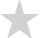
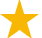
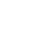
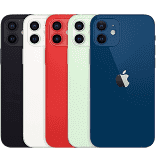
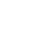
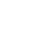
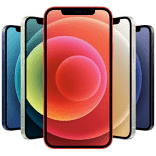
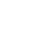
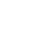
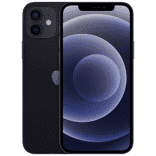
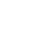
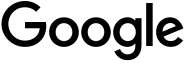

In [68]:
soup=BeautifulSoup(chrome.page_source,'lxml')
soup

In [69]:
divs=soup.find_all('div',class_="tF2Cxc")
divs

[<div class="tF2Cxc" data-hveid="CAQQAA" data-ved="2ahUKEwidvOy4-L_uAhUCyYsBHehtCQYQFSgAMAB6BAgEEAA"><div class="yuRUbf"><a data-ved="2ahUKEwidvOy4-L_uAhUCyYsBHehtCQYQFjAAegQIBBAC" href="https://www.apple.com/tw/iphone-12/" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.apple.com/tw/iphone-12/&amp;ved=2ahUKEwidvOy4-L_uAhUCyYsBHehtCQYQFjAAegQIBBAC"><br/><h3 class="LC20lb DKV0Md"><span>iPhone 12 與iPhone 12 mini - Apple (台灣)</span></h3><div class="TbwUpd NJjxre"><cite class="iUh30 Zu0yb qLRx3b tjvcx">www.apple.com<span class="dyjrff qzEoUe"><span> › iphone-12</span></span></cite></div></a><div class="B6fmyf"><div class="TbwUpd"><cite class="iUh30 Zu0yb qLRx3b tjvcx">www.apple.com<span class="dyjrff qzEoUe"><span> › iphone-12</span></span></cite></div><div class="eFM0qc"><span><div class="action-menu" jscontroller="hiU8Ie"><a aria-expanded="false" aria-haspopup="true" aria-label="結果選項" class="GHDvEf" data-ved="2ahUKEwidvOy4-L_uAhUCyYsBHehtCQYQ7B0wAHoECAQQBQ" href="#" id="am-b

In [70]:
for div in divs:
    print(div.find('h3').text.strip())
    print(div.find('a').get('href'))

iPhone 12 與iPhone 12 mini - Apple (台灣)
https://www.apple.com/tw/iphone-12/
購買iPhone 12 Pro 與iPhone 12 Pro Max - Apple (台灣)
https://www.apple.com/tw/shop/buy-iphone/iphone-12-pro
iPhone 12 (256G) - PChome 24h購物
https://24h.pchome.com.tw/store/DYAJ00
iPhone 12/ i12 mini/ i12 Pro Max 優惠中  Apple, iPhone旗艦館 ...
https://www.myfone.com.tw/buy/index.php?action=apple-iphone-12
iPhone12、iPhone 12 Pro天差地遠？相機多模式直球對決，夜 ...
https://www.techteller.com/review/iphone-12-pro-unboxing/
iPhone12 - momo購物網
https://m.momoshop.com.tw/search.momo?searchKeyword=iPhone12&couponSeq=&searchType=1&cateLevel=NaN&curPage=1&cateCode=1100100000&cateName=%E6%99%BA%E6%85%A7%E5%9E%8B%E6%89%8B%E6%A9%9F%2848%29&maxPage=29&minPage=1&_advCp=N&_advFirst=N&_advFreeze=N&_advSuperstore=N&_advTvShop=N&_advTomorrow=N&_advNAM=N&_advStock=N&_advPrefere=N&_advThreeHours=N&_advPriceS=&_advPriceE=&_brandNameList=&_brandNoList=&ent=b&_imgSH=fourCardType&specialGoodsType=&_isFuzzy=0&_spAttL=&_mAttL=&_sAttL=&_noAttL=&mdiv=8100700000-bt_7_

## 程式練習  
開啟youtube進行電影搜尋  
點選篩選器  	
選擇長片  
儲存成list  

In [86]:
import time

url='https://www.youtube.com/?gl=TW'

xpath=r'/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div/div[1]/input'

path=r'C:\webdriver\chromedriver'

chrome=getChrome(url,path)


### 查找輸入框

In [87]:
element=chrome.find_element_by_xpath(xpath)
element.send_keys('電影\n')

time.sleep(3)
xpath='/html/body/ytd-app/div/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[1]/div[2]/ytd-search-sub-menu-renderer/div[1]/div/ytd-toggle-button-renderer/a/paper-button/yt-icon'
chrome.find_element_by_xpath(xpath).click()

time.sleep(2)    
xpath='/html/body/ytd-app/div/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[1]/div[2]/ytd-search-sub-menu-renderer/div[1]/iron-collapse/div/ytd-search-filter-group-renderer[3]/ytd-search-filter-renderer[2]/a/div/yt-formatted-string'
chrome.find_element_by_xpath(xpath).click()

### 開始查找

In [90]:
print('電影查找中......')     
soup=BeautifulSoup(chrome.page_source,'lxml')
links=soup.find_all(id="video-title")

movies=[]

for link in links:
    if link!=None:
        try:
            print(link.text.strip())    
            print(link['href'])                   
            movies.append([link.text.strip(),url.split('/?')[0]+link['href']])
        except Exception as e:
            print(e)


movies       

電影查找中......
[Sub Eng]最新電影2021《鬼拳1》最新香港動作片電影 拳手揭開巨大陰謀 2021動作電影【歡迎訂閱VSO影視獨播】
/watch?v=uCl761OO93Y
2021犯罪动作片《极冻浩劫》中英字幕 最新电影🎬
/watch?v=BZOXSVJsA78
[ 拆弹专家 ] | 2021古装奇幻片| 最新电影 2021 |  动作电影 2021.
/watch?v=oCAF8ryFY-c
最新电影2021 《破 局》香港电影 刘德华 郭富城 主义 国语
/watch?v=OSieq9kDrXM
电影 动作惊悚片《杀手精英》 最新电影2021
/watch?v=tGTUP6EjoCw
新版 [花木兰] 刘亦菲 主演《刘白幽灵传奇.绝命逃亡》最新电影2020 古装武侠片
/watch?v=TvM2M3JIXNs
2021年最新电影《控制》任达华 吴彦祖 惠英红 姚晨 主演  香港电影 国语 中韩字幕
/watch?v=JrTijDtzxF4
2021 最新电影喜剧【唐人街探案3】 继曼谷之后纽约以及东京再出大案！喜剧悬疑侦探剧情片 720P高清完整版
/watch?v=JpbecKgafjA
惊悚动作片 电影《轰天复仇》 杰森·斯坦森. 、珍妮弗·洛佩兹 主演 最新电影 欧美片
/watch?v=dFDlRbwjJCA
[ 茅山 ] | 2021古装奇幻片| 最新电影 2021 |  动作电影 2021.
/watch?v=9D_wh8aYyA0
最新电影 2021 - 動作片 2021 - 最佳动作电影 2021 年 - 高清完整版 (中文字幕) #8
/watch?v=UsQKPk6rerg
鬥魚 電影版 2019 最新 電影
/watch?v=ox8bcTaPT-I
战争片 特种部队《勇者行动》最新电影2021  中英字幕
/watch?v=m6DF3yM0LIE
《动作电影》  战狼2 [Wolf Warrior 2]
/watch?v=Ufh163rIRCw
《沙蟒围城》 2021 最新电影   古装奇幻片 2021   动作电影 2021
/watch?v=fuVErXhX09A
2021/经典电影回顾/动作喜剧电影《降魔传》主演：郑恺 张雨绮 谢依霖 王祖蓝 金思雨 毛俊杰 罗家英 甄淇
/watch?v=2EH6f7Kj2Jc

[['[Sub Eng]最新電影2021《鬼拳1》最新香港動作片電影 拳手揭開巨大陰謀 2021動作電影【歡迎訂閱VSO影視獨播】',
  'https://www.youtube.com/watch?v=uCl761OO93Y'],
 ['2021犯罪动作片《极冻浩劫》中英字幕 最新电影🎬', 'https://www.youtube.com/watch?v=BZOXSVJsA78'],
 ['[ 拆弹专家 ] | 2021古装奇幻片| 最新电影 2021 |  动作电影 2021.',
  'https://www.youtube.com/watch?v=oCAF8ryFY-c'],
 ['最新电影2021 《破 局》香港电影 刘德华 郭富城 主义 国语',
  'https://www.youtube.com/watch?v=OSieq9kDrXM'],
 ['电影 动作惊悚片《杀手精英》 最新电影2021', 'https://www.youtube.com/watch?v=tGTUP6EjoCw'],
 ['新版 [花木兰] 刘亦菲 主演《刘白幽灵传奇.绝命逃亡》最新电影2020 古装武侠片',
  'https://www.youtube.com/watch?v=TvM2M3JIXNs'],
 ['2021年最新电影《控制》任达华 吴彦祖 惠英红 姚晨 主演  香港电影 国语 中韩字幕',
  'https://www.youtube.com/watch?v=JrTijDtzxF4'],
 ['2021 最新电影喜剧【唐人街探案3】 继曼谷之后纽约以及东京再出大案！喜剧悬疑侦探剧情片 720P高清完整版',
  'https://www.youtube.com/watch?v=JpbecKgafjA'],
 ['惊悚动作片 电影《轰天复仇》 杰森·斯坦森. 、珍妮弗·洛佩兹 主演 最新电影 欧美片',
  'https://www.youtube.com/watch?v=dFDlRbwjJCA'],
 ['[ 茅山 ] | 2021古装奇幻片| 最新电影 2021 |  动作电影 2021.',
  'https://www.youtube.com/watch?v=9D_wh8aYyA0'],
 ['最新电影 2021 - 動作片 2021 - 最佳动作

In [91]:
len(movies)

78

### 捲動網頁

In [89]:
for i in range(0,100000,1000):
        chrome.execute_script(f"window.scrollTo({count}, {count+i})") 
        count+=i  

In [92]:
chrome.quit()    

## 捲動網頁函式

In [93]:
def scroll(chrome,start=0,stop=100000,step=1000):
    if chrome!=None:
        count=0
        for i in range(start,stop,step):
            chrome.execute_script(f"window.scrollTo({count}, {count+i})") 
            count+=i  